In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import cv2
import json

import os
import time

# from sklearn.model_selection import train_test_split

# %load_ext autoreload
# %autoreload 2
# import FusionModel_tools as fm
# import importlib
# importlib.reload(fm)

# import nltk
# nltk.download('popular', quiet = True)


## product categories

In [20]:
product_class = pd.read_csv('../datasets/product_class.csv', sep = ';')
print(product_class.shape)
product_class

(27, 3)


,target,prdtypecode,prodtype
0,0,10,livres_adulte
1,24,40,jeux_videos_import
2,25,50,accessoires_jeux_videos
3,26,60,jeux_et_consoles_retro
4,1,1140,goodies_geek
5,2,1160,cartes_a_jouer
6,3,1180,figurines_wargames
7,4,1280,jouets_enfance
8,5,1281,jeux_societe
9,6,1300,modeles_reduits_ou_telecommandes


In [3]:
reload = True

if reload:
    
    path = '../fm/Splitted_datasets/Images_224px/'
    
    df_X_train_sorted = pd.read_csv(path + '2308272257_df_X_train_sorted.csv', header = 0, index_col = 0)
    df_X_val_sorted = pd.read_csv(path + '2308272257_df_X_val_sorted.csv', header = 0, index_col = 0)
    df_X_test_sorted = pd.read_csv(path + '2308272257_df_X_test_sorted.csv', header = 0, index_col = 0)
    
    df_y_train_sorted = pd.read_csv(path + '2308272257_df_y_train_sorted.csv', header = 0, index_col = 0)
    df_y_val_sorted = pd.read_csv(path + '2308272257_df_y_val_sorted.csv', header = 0, index_col = 0)
    df_y_test_sorted = pd.read_csv(path + '2308272257_df_y_test_sorted.csv', header = 0, index_col = 0)

In [6]:
df_X_test_sorted.head()

,designation,description,productid,imageid
258,Télémaque - Je Ne Sais Quoi De Pur Et De Sublime,NaN,580161,1000076039
79961,Armées D'aujourd'hui 391 - 1914 Le Monde S'emb...,NaN,348990858,1000089455
7324,Carte Pokemon Francaise Xy 3 Poings Furieux Sc...,NaN,344209267,1000095646
19807,Naruto Cartes À Jouer Et À Collectionner - Cof...,NaN,148177050,1000095647
65894,Forfatterens Død Og Andre Essays,Livre de Roland Barthes traduit en danois.Titr...,355017693,1000228891


In [8]:
df_y_test_sorted.head()

,prdtypecode
258,10
79961,2280
7324,1160
19807,1160
65894,10


In [9]:
len(df_X_test_sorted)

16984

In [10]:
df_X_test_sorted[ df_y_test_sorted['prdtypecode']==2583]

,designation,description,productid,imageid
43593,Alarme Piscine - Aqualarm Classic - norme NF P...,Aqualarm possède 2 modes de fonctionnement : l...,367180564,1001455509
79650,Pierre Volcanique pour sauna - 20kg - Ø jusqu'...,Ces pierres d&#39;origine volcanique sont util...,367178221,1001456117
37425,Sac de Douche Solaire Camping 15 l,NaN,405102365,1004450866
15459,VELLEMAN THERMOMÈTRE SANS FIL POUR PISCINE/BAS...,NaN,408912765,1004721159
20946,Pompe Europa - 0.75 CV - Monophasée,<p>Pompe Europa - 0.75 CV - Monophasée - Préfi...,417041469,1005743672
...,...,...,...,...
10438,BAYROL Spa Time - Chlore Microbilles,Les microbilles au chlore stabilisé SpaTime d...,303051086,995098645
48452,HTH Spa choc sans chlore poudre - 1.2 kg,HTH Spa choc est un désinfectant choc en poudr...,303051125,995102655
4397,Douche UBBINK Solaris plus 7504625,Cette douche colonne démontable en 2 parties c...,303052114,995103154
49637,HTH Spa nettoyant ligne d'eau - 1L,HTH spa un nettoyant de ligne d&#39;eau ultra ...,303051112,995303686


In [11]:
null_model_accuracy = 2042 / 16984
null_model_accuracy

0.12023080546396608

In [12]:
print(len(df_X_train_sorted))
print(len(df_X_val_sorted))
print(len(df_X_test_sorted))

54345
13587
16984


In [14]:
df_y_train_sorted['prdtypecode'].value_counts(normalize = True).sort_values(ascending = False).head(10)
# df_y_val_sorted['prdtypecode'].value_counts(normalize = True).sort_values(ascending = False).head(10)
# df_y_test_sorted['prdtypecode'].value_counts(normalize = True).sort_values(ascending = False).head(10)

2583    0.120213
1560    0.059730
1300    0.059417
2060    0.058791
2522    0.058754
1280    0.057356
2403    0.056215
2280    0.056049
1920    0.050658
1160    0.046554
Name: prdtypecode, dtype: float64

**model**

In [17]:
def null_model_predict(X_data):
    
    y_pred = []
    for i in range(len(X_data)):
        y_pred.append(2583)
        
    return y_pred

**Predictions**

In [21]:
y_pred = null_model_predict(df_X_test_sorted)

y_test = df_y_test_sorted['prdtypecode']

In [22]:
categories = product_class['prdtypecode'].tolist()

yy_pred = pd.Categorical(y_pred, categories = categories)
yy_test = pd.Categorical(y_test, categories = categories)

cm = pd.crosstab(yy_test, yy_pred, rownames=['Reality'], colnames=['Predictions'], dropna = False)

(27, 27)


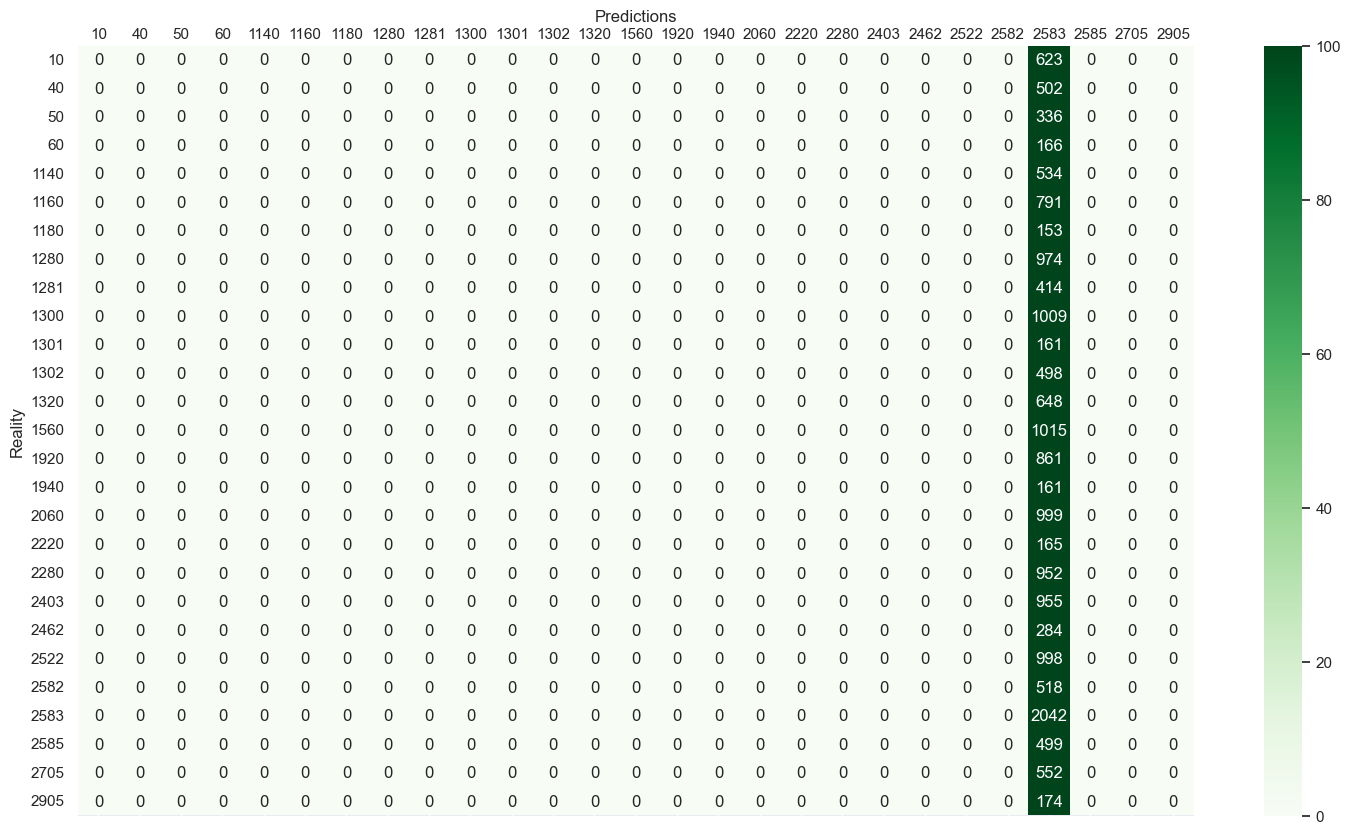

In [23]:
print(cm.shape)

fig, ax = plt.subplots(figsize = (18,10))
sns.heatmap(cm, annot = True, ax=ax, cmap='Greens', fmt ='d', vmin = 0, vmax = 100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_tick_params(length = 0)
ax.xaxis.set_label_position('top')

**Save confusion matrix**

In [24]:
export = False

if export:
    filename = base_text_path + model_date_time + '_txt_svc' + '_confusionMatrix.csv'
    
    cm.to_csv(filename, header = True, index = True)
    print(filename)

**Classification Report: macro & micro**

In [25]:
from sklearn.metrics import classification_report 

cr = classification_report(y_test, y_pred, output_dict = True)
cr.update({"accuracy": {"precision": None, "recall": None, "f1-score": cr["accuracy"], "support": cr['macro avg']['support']}})

micro_svc = pd.DataFrame(cr).transpose().reset_index().rename(columns={'index': 'prdtypecode'}).iloc[:-3,:]
macro_svc = pd.DataFrame(cr).transpose().reset_index().rename(columns={'index': 'metrics'}).iloc[-3:,:]

# display(micro_dt)
# display(macro_dt)

C:\Users\19rod\anaconda3\envs\rakuten_env2\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\19rod\anaconda3\envs\rakuten_env2\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\19rod\anaconda3\envs\rakuten_env2\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          10       0.00      0.00      0.00       623
          40       0.00      0.00      0.00       502
          50       0.00      0.00      0.00       336
          60       0.00      0.00      0.00       166
        1140       0.00      0.00      0.00       534
        1160       0.00      0.00      0.00       791
        1180       0.00      0.00      0.00       153
        1280       0.00      0.00      0.00       974
        1281       0.00      0.00      0.00       414
        1300       0.00      0.00      0.00      1009
        1301       0.00      0.00      0.00       161
        1302       0.00      0.00      0.00       498
        1320       0.00      0.00      0.00       648
        1560       0.00      0.00      0.00      1015
        1920       0.00      0.00      0.00       861
        1940       0.00      0.00      0.00       161
        2060       0.00      0.00      0.00       999
        2220       0.00    

C:\Users\19rod\anaconda3\envs\rakuten_env2\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\19rod\anaconda3\envs\rakuten_env2\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\19rod\anaconda3\envs\rakuten_env2\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


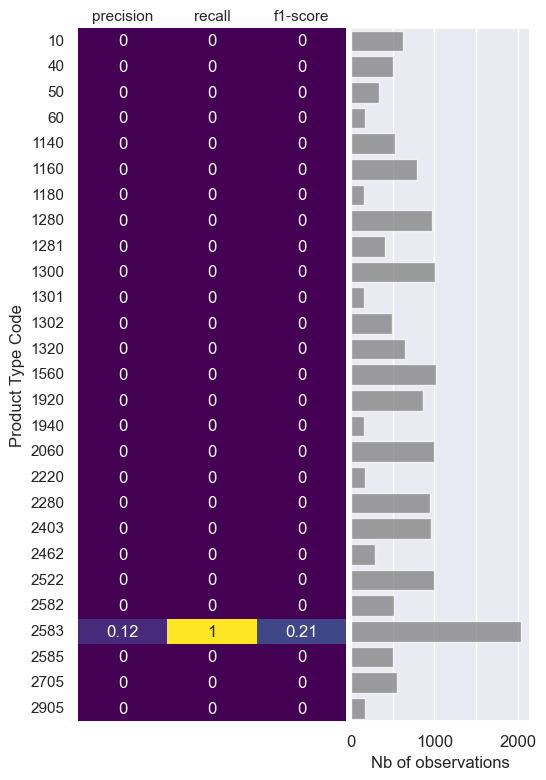

In [27]:
import FusionModel_tools as fm

fm.plot_classificationReport(micro_svc)

In [28]:
display(macro_svc)

,metrics,precision,recall,f1-score,support
27,accuracy,NaN,NaN,0.120231,16984.0
28,macro avg,0.004453,0.037037,0.007950,16984.0
29,weighted avg,0.014455,0.120231,0.025808,16984.0
